In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import itertools

#fx1 = lambda x1,x2,gamma:(x1**2 + x2 ** 2 * gamma)/2
pi = math.pi
def log(x):
    return math.log(x)
def cos(x):
    return math.cos(x)
def sin(x):
    return math.sin(x)
def exp(x):
    return np.exp(x)
def real(x):
    return np.real(x)
def imag(x):
    return np.imag(x)

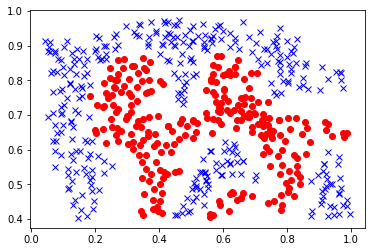

In [5]:
df = pd.read_csv("train_2d.txt", sep=',')
df_x = df[['x1','x2']]
df_y = df['y']
df_sub1 = df[df['y'] == 0]
df_sub2 = df[df['y'] == 1]
plt.plot(df_sub1['x1'],df_sub1['x2'],'ro')
plt.plot(df_sub2['x1'],df_sub2['x2'],'bx')

In [6]:


def sigmoid(x,seta):
    #think x,seta as n * m - numpy array
    # x = n x m seta = m array
    # output as n*1 array
    
    return 1 / (1+ np.exp(-1*np.matmul(x,seta)))

def log_gradient(x,y,seta):
    # y = n *1
    z = np.matmul(sigmoid(x,seta)-y,x)
    return z/y.size

# using =X D X^T
# where X = x, D = diagonal matrix that has h(z)(1-h(z))
# ref = https://stats.stackexchange.com/questions/68391/hessian-of-logistic-function
def log_hessian(x,y,seta):
    #first step get diagonal mtx 
  
    m = y.size
    D = np.zeros((m,m))
    for i,x_i in enumerate(x):
        h = sigmoid(x_i, seta)
       # print(h)
        D[i][i] = h * (1-h)
    
   # print('------------------')
   # print(seta)
    #print('------------------')
    #print(D)
    # y = n *1
    #A = np.matmul(x,D)
    xt = np.transpose(x)
   
    H = np.matmul(np.matmul(xt,D),x)
    
    return H

class LogsitcRegression_custom(object):
   
    def __init__(self,solver,itr, alpha):
        self.solver = solver
        self.itr = itr
        self.alpha = alpha
    
    def fit(self,x,y):        
        if self.solver == 'gradient':
            m = y.size
            n = x.loc[0].size+1
            seta = np.zeros((n))
            ny = y.to_numpy()
            nx_ = x.to_numpy()
            #print((np.zeros(m) + 1).shape)
            nx = np.hstack([np.ones(m).reshape(m,1),x.to_numpy()])
            print(nx)
            nx = nx/np.linalg.norm(nx, ord=2, axis=1, keepdims=True)
            
            for i in tqdm(range(1,self.itr),mininterval=1):

                #for j in range(1,m):
                z = nx.dot(seta)
                h = 1 / (np.exp((-1)* z) + 1)
                y_ = h
                y_check = np.rint(y_)
              #  print(y_check)
                distance = np.linalg.norm(ny-y_check,ord=1)
                if (i % 100) == 1:
                    print(str((m-distance) / m * 100) + '% accuracy' )

                gdsum = np.zeros((n))
                for j in range (0,m):
                    for k in range (0,n): 
                        gdsum[k] += ((ny[j] - y_[j]) * nx[j][k]) / m
                     #   gdsum[1] += ((ny[j] - y_[j]) * nx[j][1]) / m
                     #   gdsum[2] += ((ny[j] - y_[j]) * nx[j][2]) / m
           #     print(seta)
                seta = seta + self.alpha * gdsum
            self.seta = seta
        elif self.solver == 'newton':
            m = y.size
            n = x.loc[0].size
            
            seta = np.zeros((n))
            ny = y.to_numpy()
            nx = x.to_numpy()
           # print(ny)
            for i in tqdm(range(1,self.itr),mininterval=1):
              
                G_ = log_gradient(nx,ny,seta)
                H_ = log_hessian(nx,ny,seta)
                H_inv = np.linalg.inv(H_)
              #  print(H_inv)
              #  print(G_)
                seta = seta - self.alpha * (np.matmul(H_inv , G_))
                if (i % 100) == 1:
                    z = nx.dot(seta)
                    h = 1 / (np.exp((-1)* z) + 1)
                    y_ = h
                    y_check = np.rint(y_)
                    distance = np.linalg.norm(ny-y_check,ord=1)
                    #sigmoid (x,seta)
                    print(str((m-distance) / m * 100) + '% accuracy' )

            self.seta = seta
       
    def predict (self,x):
        nx = x.to_numpy()
        z = nx.dot(self.seta)
        h = 1 / (np.exp((-1)* z) + 1)
        y_ = np.rint(h)
        return y_
    def getseta (self):
        return self.seta

In [7]:
lr = LogsitcRegression_custom(solver = 'gradient', itr = 10000, alpha = 0.2)
lr.fit(df_x,df_y)
seta = lr.getseta()

#lr.custom

[[1.       0.146313 0.402632]
 [1.       0.367512 0.63962 ]
 [1.       0.563364 0.59576 ]
 ...
 [1.       0.975806 0.439474]
 [1.       0.160138 0.777047]
 [1.       0.46659  0.67617 ]]


  0%|                                                 | 0/9999 [00:00<?, ?it/s]

43.59861591695502% accuracy
56.40138408304498% accuracy


  1%|▌                                     | 149/9999 [00:01<01:06, 148.26it/s]

56.40138408304498% accuracy
52.07612456747405% accuracy


  3%|█▏                                    | 310/9999 [00:02<01:03, 151.69it/s]

54.15224913494809% accuracy


  5%|█▊                                    | 473/9999 [00:03<01:01, 154.87it/s]

56.57439446366782% accuracy
58.65051903114187% accuracy


  6%|██▍                                   | 637/9999 [00:04<00:59, 157.41it/s]

58.99653979238755% accuracy
58.47750865051903% accuracy


  8%|███                                   | 806/9999 [00:05<00:57, 160.49it/s]

56.92041522491349% accuracy


 10%|███▋                                  | 975/9999 [00:06<00:55, 162.86it/s]

56.57439446366782% accuracy
55.536332179930795% accuracy


 11%|████▏                                | 1141/9999 [00:07<00:54, 163.59it/s]

55.017301038062286% accuracy
54.67128027681662% accuracy


 13%|████▊                                | 1311/9999 [00:08<00:52, 165.42it/s]

54.498269896193776% accuracy


 15%|█████▍                               | 1482/9999 [00:09<00:51, 166.81it/s]

54.498269896193776% accuracy
54.325259515570934% accuracy


 17%|██████                               | 1650/9999 [00:10<00:50, 166.91it/s]

54.67128027681662% accuracy
54.67128027681662% accuracy


 18%|██████▋                              | 1820/9999 [00:11<00:48, 167.58it/s]

54.498269896193776% accuracy


 20%|███████▎                             | 1990/9999 [00:12<00:47, 168.05it/s]

54.844290657439444% accuracy
54.844290657439444% accuracy


 22%|███████▉                             | 2157/9999 [00:13<00:46, 167.53it/s]

55.017301038062286% accuracy
55.19031141868512% accuracy


 23%|████████▌                            | 2324/9999 [00:14<00:46, 166.12it/s]

55.19031141868512% accuracy


 25%|█████████▏                           | 2494/9999 [00:15<00:44, 167.27it/s]

55.36332179930796% accuracy
55.36332179930796% accuracy


 27%|█████████▊                           | 2663/9999 [00:16<00:43, 167.53it/s]

55.536332179930795% accuracy
55.536332179930795% accuracy


 28%|██████████▍                          | 2832/9999 [00:17<00:42, 167.82it/s]

55.70934256055363% accuracy
55.88235294117647% accuracy


 30%|███████████                          | 3001/9999 [00:18<00:41, 168.17it/s]

55.88235294117647% accuracy


 32%|███████████▋                         | 3169/9999 [00:19<00:40, 167.97it/s]

55.88235294117647% accuracy
56.22837370242214% accuracy


 33%|████████████▎                        | 3337/9999 [00:20<00:39, 166.63it/s]

56.22837370242214% accuracy
56.40138408304498% accuracy


 35%|████████████▉                        | 3504/9999 [00:21<00:39, 165.95it/s]

56.747404844290664% accuracy


 37%|█████████████▌                       | 3670/9999 [00:22<00:38, 165.81it/s]

56.747404844290664% accuracy
56.747404844290664% accuracy


 38%|██████████████▏                      | 3838/9999 [00:23<00:37, 166.26it/s]

56.40138408304498% accuracy
56.57439446366782% accuracy


 40%|██████████████▊                      | 4005/9999 [00:24<00:36, 165.69it/s]

56.40138408304498% accuracy


 42%|███████████████▍                     | 4171/9999 [00:25<00:35, 164.41it/s]

56.40138408304498% accuracy
56.40138408304498% accuracy


 43%|████████████████                     | 4336/9999 [00:26<00:34, 163.90it/s]

56.40138408304498% accuracy
56.40138408304498% accuracy


 45%|████████████████▋                    | 4505/9999 [00:27<00:33, 165.15it/s]

56.22837370242214% accuracy


 47%|█████████████████▎                   | 4674/9999 [00:28<00:32, 166.19it/s]

56.22837370242214% accuracy
56.22837370242214% accuracy


 48%|█████████████████▉                   | 4841/9999 [00:29<00:31, 166.23it/s]

56.22837370242214% accuracy
56.22837370242214% accuracy


 50%|██████████████████▌                  | 5009/9999 [00:30<00:29, 166.71it/s]

56.22837370242214% accuracy


 52%|███████████████████▏                 | 5179/9999 [00:31<00:28, 167.63it/s]

56.22837370242214% accuracy
56.22837370242214% accuracy


 53%|███████████████████▊                 | 5347/9999 [00:32<00:27, 167.44it/s]

56.22837370242214% accuracy
56.40138408304498% accuracy


 55%|████████████████████▍                | 5518/9999 [00:33<00:26, 168.39it/s]

56.40138408304498% accuracy


 57%|█████████████████████                | 5690/9999 [00:34<00:25, 169.31it/s]

56.40138408304498% accuracy
56.40138408304498% accuracy


 59%|█████████████████████▋               | 5860/9999 [00:35<00:24, 168.91it/s]

56.22837370242214% accuracy
56.22837370242214% accuracy


 60%|██████████████████████▎              | 6029/9999 [00:36<00:23, 168.89it/s]

56.22837370242214% accuracy


 62%|██████████████████████▉              | 6198/9999 [00:37<00:22, 168.87it/s]

56.22837370242214% accuracy
56.22837370242214% accuracy


 64%|███████████████████████▌             | 6367/9999 [00:38<00:21, 168.76it/s]

56.22837370242214% accuracy
56.05536332179931% accuracy


 65%|████████████████████████▏            | 6536/9999 [00:39<00:20, 168.58it/s]

56.05536332179931% accuracy
56.05536332179931% accuracy


 67%|████████████████████████▊            | 6705/9999 [00:40<00:19, 168.00it/s]

56.05536332179931% accuracy


 69%|█████████████████████████▍           | 6874/9999 [00:41<00:18, 165.24it/s]

56.05536332179931% accuracy
55.88235294117647% accuracy


 70%|██████████████████████████           | 7040/9999 [00:42<00:17, 165.32it/s]

56.05536332179931% accuracy
56.05536332179931% accuracy


 72%|██████████████████████████▋          | 7206/9999 [00:43<00:17, 164.24it/s]

56.05536332179931% accuracy


 74%|███████████████████████████▎         | 7372/9999 [00:44<00:15, 164.52it/s]

56.05536332179931% accuracy
56.05536332179931% accuracy


 75%|███████████████████████████▉         | 7537/9999 [00:45<00:15, 163.98it/s]

56.05536332179931% accuracy
56.05536332179931% accuracy


 77%|████████████████████████████▌        | 7703/9999 [00:46<00:13, 164.33it/s]

56.05536332179931% accuracy


 79%|█████████████████████████████        | 7868/9999 [00:47<00:13, 163.51it/s]

55.88235294117647% accuracy
55.88235294117647% accuracy


 80%|█████████████████████████████▋       | 8036/9999 [00:48<00:11, 164.68it/s]

55.88235294117647% accuracy
55.88235294117647% accuracy


 82%|██████████████████████████████▎      | 8201/9999 [00:49<00:10, 163.89it/s]

55.88235294117647% accuracy


 84%|██████████████████████████████▉      | 8365/9999 [00:50<00:09, 163.88it/s]

55.88235294117647% accuracy
55.88235294117647% accuracy


 85%|███████████████████████████████▌     | 8531/9999 [00:51<00:08, 164.26it/s]

55.88235294117647% accuracy


 87%|████████████████████████████████▏    | 8697/9999 [00:52<00:07, 164.63it/s]

55.88235294117647% accuracy
55.88235294117647% accuracy


 89%|████████████████████████████████▊    | 8862/9999 [00:53<00:06, 164.20it/s]

55.88235294117647% accuracy
56.05536332179931% accuracy


 90%|█████████████████████████████████▍   | 9027/9999 [00:54<00:05, 163.03it/s]

56.05536332179931% accuracy


 92%|██████████████████████████████████   | 9191/9999 [00:55<00:04, 161.87it/s]

56.05536332179931% accuracy
56.05536332179931% accuracy


 94%|██████████████████████████████████▌  | 9353/9999 [00:56<00:04, 160.27it/s]

56.22837370242214% accuracy
56.22837370242214% accuracy


 95%|███████████████████████████████████▏ | 9514/9999 [00:57<00:03, 160.44it/s]

56.22837370242214% accuracy


 97%|███████████████████████████████████▊ | 9675/9999 [00:58<00:02, 160.61it/s]

56.22837370242214% accuracy
56.22837370242214% accuracy


 98%|████████████████████████████████████▍| 9838/9999 [00:59<00:00, 161.18it/s]

56.22837370242214% accuracy


100%|█████████████████████████████████████| 9999/9999 [01:00<00:00, 165.31it/s]


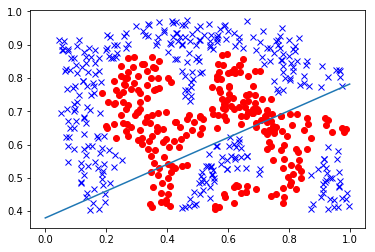

In [80]:
plt.plot(df_sub1['x1'],df_sub1['x2'],'ro')
plt.plot(df_sub2['x1'],df_sub2['x2'],'bx')
drawx1 =  np.linspace(0, 1, 100)
#s0 + x1 s1 + x2 s2 = 0 인점은
# x2 = (-s0 - s1) x1  / s2
drawx2 = (-seta[0] - seta[1] * drawx1) / seta[2]
#for i,x1 in enumerate(drawx1):
plt.plot(drawx1,drawx2)

In [33]:
#from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(df_x, df_y)
#clf.score(df_x, df_y)

In [28]:
class NaiveBayesClassifier_cont_input:
    def __init__(self, k=0.5,method = 'g-distribution'):
        self.k = k
        self.word_probs = []
        self.method = 'g-distribution'
    def fit(self, x,y):
        xy = pd.concat([x, y], axis=1)
        #print(xy)
        if self.method == 'g-distribution':
            #x1, x2 ... 에 대해서 가우시안 분포를 만든다.
            m = y.size
            n = x.loc[0].size       
            self.n = n
            ny = y.to_numpy()
            nx = x.to_numpy()
            fx_list = []
            mean_y0_list = []
            mean_y1_list = []
            var_y0_list = []
            var_y1_list = []
            for i in range (0,n):
                xy_0 = xy[xy['y'] == 0]
                xy_1 = xy[xy['y'] == 1]
                self.py1 = xy_0.shape[0]
                self.py2 = xy_1.shape[0]
                
                nx_y0_mean = xy_0.iloc[:,i].mean()
                nx_y0_var = xy_0.iloc[:,i].var()
                nx_y1_mean = xy_1.iloc[:,i].mean()
                nx_y1_var = xy_1.iloc[:,i].var()                
                
                mean_y0_list.append(nx_y0_mean)
                var_y0_list.append(nx_y0_var)
                
                mean_y1_list.append(nx_y1_mean)
                var_y1_list.append(nx_y1_var)
                
             #   print(nx_y0_mean,nx_y0_var)
             #   print(nx_y1_mean,nx_y1_var)
                fx1 = lambda x__ : (2* pi * nx_y0_var) ** (-0.5) * exp( -((x__-nx_y0_mean)** 2) /  (2 * nx_y0_var))
                fx2 = lambda x__ : (2* pi * nx_y1_var) ** (-0.5) * exp( -((x__-nx_y1_mean)** 2) /  (2 * nx_y1_var) )                                                    
                fx_list.append((fx1,fx2))
            self.mean_y0_list = mean_y0_list
            self.mean_y1_list = mean_y1_list
            self.var_y0_list = var_y0_list
            self.var_y1_list = var_y1_list
            self.gaussians = fx_list
    def classify(self, x):
        if self.method == 'g-distribution':
            mul1 = 1
            mul2 = 1
            for i in range (0,self.n):
                (fx1,fx2) = self.gaussians[i]
                #print( x[i] , fx1(x[i]))
                mul1 = mul1 * fx1(x[i]) 
                mul2 = mul2 * fx2(x[i])
                #print(mul1,mul2)
            summer = mul2 / (mul1+ mul2)
           # print ('finall prob = ' +str(summer))
            return summer
    def modify_moveval(self,idx,mean,val,y_0):
        if y_0 == 0:
            self.mean_y0_list[idx] += mean
            self.var_y0_list[idx] += val
            fx1,fx2 = self.gaussians[idx]
            fx1 = lambda x__ : (2* pi * self.var_y0_list[idx]) ** (-0.5) * exp( -((x__- self.mean_y0_list[idx])** 2) /  (2 * self.var_y0_list[idx]))
            self.gaussians[idx] = (fx1,fx2)
        if y_0 == 1:
            self.mean_y1_list[idx] += mean
            self.var_y1_list[idx] += val
            fx1,fx2 = self.gaussians[idx]
            fx2 = lambda x__ : (2* pi * self.var_y1_list[idx]) ** (-0.5) * exp( -((x__- self.mean_y1_list[idx])** 2) /  (2 * self.var_y1_list[idx]))
            self.gaussians[idx] = (fx1,fx2)

In [45]:
NB = NaiveBayesClassifier_cont_input(k = '0.5', method = 'g-distribution')
NB.fit(df_x,df_y)
NB.modify_moveval( 0,(0.2),(0.01),1 )
NB.modify_moveval( 0,(0.1),(0),0 )
r_y = []
for index, xx in df_x.iterrows():
  #  print(xx)
   # print(xx[0])
    prob1 = NB.classify(xx)
    if prob1 >= 0.5:
        r_y.append (1)
    else:
        r_y.append (0)

df_ry = pd.DataFrame(r_y,columns=['y'])
df_trained_mv2 = pd.concat([df_x, df_ry], axis=1)
#df_trained = df_x.append(r_y)

0.6868512110726643


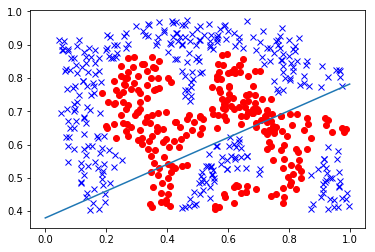

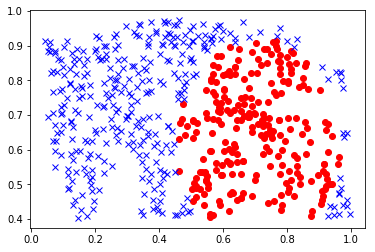

In [36]:
count_right=0
count_wrong=0
for index, xy in df_trained.iterrows():
    if xy['y'] == df.iloc[index]['y']:
        count_right+=1
    else :
        count_wrong+=1
        
print(count_right/(count_right+count_wrong))
#df_trained

df_ry = pd.DataFrame(r_y,columns=['y'])
df_trained = pd.concat([df_x, df_ry], axis=1)
drawx1 =  np.linspace(0, 1, 100)
df_sub1 = df[df['y'] == 0]
df_sub2 = df[df['y'] == 1]
plt.plot(df_sub1['x1'],df_sub1['x2'],'ro')
plt.plot(df_sub2['x1'],df_sub2['x2'],'bx')
drawx2 = (-seta[0] - seta[1] * drawx1) / seta[2]
#for i,x1 in enumerate(drawx1):
plt.plot(drawx1,drawx2)

plt.figure()
df_sub11 = df_trained[df_trained['y'] == 0]
df_sub22 = df_trained[df_trained['y'] == 1]
plt.plot(df_sub11['x1'],df_sub11['x2'],'ro')
plt.plot(df_sub22['x1'],df_sub22['x2'],'bx')

0.629757785467128


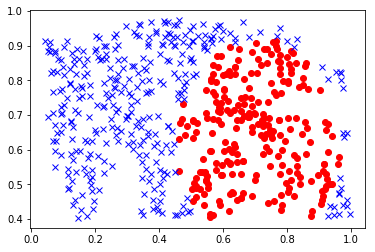

In [35]:
count_right=0
count_wrong=0
for index, xy in df_trained_mv1.iterrows():
    if xy['y'] == df.iloc[index]['y']:
        count_right+=1
    else :
        count_wrong+=1
        
print(count_right/(count_right+count_wrong))
plt.figure()
df_sub11 = df_trained_mv1[df_trained_mv1['y'] == 0]
df_sub22 = df_trained_mv1[df_trained_mv1['y'] == 1]
plt.plot(df_sub11['x1'],df_sub11['x2'],'ro')
plt.plot(df_sub22['x1'],df_sub22['x2'],'bx')

0.7664359861591695


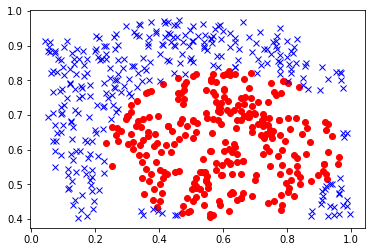

In [46]:
count_right=0
count_wrong=0
for index, xy in df_trained_mv2.iterrows():
    if xy['y'] == df.iloc[index]['y']:
        count_right+=1
    else :
        count_wrong+=1
        
print(count_right/(count_right+count_wrong))
plt.figure()
df_sub11 = df_trained_mv2[df_trained_mv2['y'] == 0]
df_sub22 = df_trained_mv2[df_trained_mv2['y'] == 1]
plt.plot(df_sub11['x1'],df_sub11['x2'],'ro')
plt.plot(df_sub22['x1'],df_sub22['x2'],'bx')